In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from six.moves import cPickle as pickle
import os
import platform

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
classes___ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols)

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        lol = list(datadict.keys())
        X = datadict.get(lol[2])
        Y = datadict.get(lol[1])
        X = X.reshape(10000,1024)
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,7):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    return Xtr, Ytr

def get_CIFAR10_data(num_training=8000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = '/content/drive/MyDrive/cifar-10-batches'
    X, Y = load_CIFAR10(cifar10_dir)

    X = X.astype('float32')


    return X, Y


# Invoke the above function to get our data.
X, Y = get_CIFAR10_data()

In [ ]:
print(X.shape)

(60000, 1024)


In [ ]:
Y.shape

(60000,)

In [ ]:
print(X)

[[ 61.  44.  48. ... 188. 124.  99.]
 [171. 133. 103. ... 136. 137. 137.]
 [255. 252. 252. ...  82.  82.  83.]
 ...
 [ 16.  15.  13. ...  26.  27.  24.]
 [ 32.  26.  33. ... 109. 109. 107.]
 [ 76. 102. 104. ... 112.  65.  26.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [ ]:
X_train.shape

(54000, 1024)

In [ ]:
Y_train.shape

(54000,)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train)

[[0.87058824 0.87058824 0.8862745  ... 0.3764706  0.38431373 0.42352942]
 [1.         0.8509804  0.21960784 ... 0.28627452 0.7294118  1.        ]
 [0.4627451  0.34901962 0.36862746 ... 0.36078432 0.21568628 0.2901961 ]
 ...
 [0.8039216  0.7607843  0.89411765 ... 0.5803922  0.5372549  0.5921569 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.75686276 0.65882355 0.65882355 ... 0.85490197 0.85882354 0.8745098 ]]


In [ ]:
ils = 1024
hls1 = 680
hls2 = 250
ols = 10

m = X_train.shape[0]

In [ ]:
def softmax(z):
  return(np.exp(z) / np.sum(np.exp(z), axis=0))

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
def sigmoidGradient(z):
  return sigmoid(z)*(1 - sigmoid(z))

In [ ]:
def backPropagation(X, Y, Theta1, Theta2, Theta3, lambda_=0.0):
  
  m = X.shape[0]
  
  loss = 0
  
  Theta1_grad = np.zeros(Theta1.shape)
  Theta2_grad = np.zeros(Theta2.shape)
  Theta3_grad = np.zeros(Theta3.shape)
  
  for i in range(m):
    a_1 = np.hstack((np.ones((1)),X[i]))
    z_2 = np.dot(Theta1,a_1)
    a_2 = np.hstack((np.ones(1), sigmoid(z_2))) 
    z_3 = np.dot(Theta2, a_2)
    a_3 = np.hstack((np.ones(1), sigmoid(z_3))) 
    z_4 = np.dot(Theta3, a_3)
    a_4 = softmax(z_4)
    
    y = np.zeros(ols)
    y[int(Y[i])]= 1
    
    delta_4 = a_4 - y
    delta_3 = np.dot(Theta3[:,1:].T, delta_4)*sigmoidGradient(z_3)
    delta_2 = np.dot(Theta2[:,1:].T, delta_3)*sigmoidGradient(z_2)
    Theta1_grad = Theta1_grad + np.dot(delta_2.reshape(delta_2.shape[0],1), a_1.reshape(a_1.shape[0],1).T)
    Theta2_grad = Theta2_grad + np.dot(delta_3.reshape(delta_3.shape[0],1), a_2.reshape(a_2.shape[0],1).T)
    Theta3_grad = Theta3_grad + np.dot(delta_4.reshape(delta_4.shape[0],1), a_3.reshape(a_3.shape[0],1).T)

    loss += y*np.log(a_4)
  
  loss = -(loss.sum()/m) + (lambda_/(2*m))*(np.sum(Theta1[:,1:]**2) + np.sum(Theta2[:,1:]**2)+ np.sum(Theta3[:,1:]**2))

  FDelta_1 = np.hstack(((1/m)*Theta1_grad[:,0:1], (1/m)*(Theta1_grad[:,1:] + lambda_*Theta1[:,1:])))
  FDelta_2 = np.hstack(((1/m)*Theta2_grad[:,0:1], (1/m)*(Theta2_grad[:,1:] + lambda_*Theta2[:,1:])))
  FDelta_3 = np.hstack(((1/m)*Theta3_grad[:,0:1], (1/m)*(Theta3_grad[:,1:] + lambda_*Theta3[:,1:])))
  
  return loss, FDelta_1, FDelta_2, FDelta_3

In [ ]:
def Gradient_Descent(X, Y, learning_rate, iterations, ils, hls1, hls2, ols, lambda_):
    
    print('shape of training dataset',X.shape)
    print('input layer size =', ils)
    print('hidden layer size =', hls1)
    print('hidden layer size =', hls2)
    print('output layer size =', ols)
    
    Theta1 = randInitializeWeights(ils, hls1)
    Theta2 = randInitializeWeights(hls1, hls2)
    Theta3 = randInitializeWeights(hls2, ols)
    cost_func = []
    
    curr_irr = 0
    
    for i in range(iterations):
      for e in range(53):
        c_f, Theta1_grad, Theta2_grad, Theta3_grad = backPropagation(X[e*1000:(e+1)*1000, :], Y[e*1000:(e+1)*1000], Theta1, Theta2, Theta3, lambda_)
        cost_func.append(c_f)
        
        Theta1 = Theta1 - learning_rate*Theta1_grad
        Theta2 = Theta2 - learning_rate*Theta2_grad
        Theta3 = Theta3 - learning_rate*Theta3_grad
          
        curr_irr = i+1
        print(curr_irr, c_f)
      
    return cost_func, curr_irr, Theta1, Theta2, Theta3

In [ ]:
def randInitializeWeights(L_in, L_out):

  epsilon_init = 0.5
  
  Theta = np.random.rand(L_out, L_in +1)*2*epsilon_init - epsilon_init
  
  return Theta

shape of training dataset (54000, 1024)
input layer size = 1024
hidden layer size = 680
hidden layer size = 250
output layer size = 10
1 5.434341412975267
1 3.5385717579325497
1 3.306583262687069
1 3.139027072613085
1 3.0101379730938023
1 2.901026220434785
1 2.852226535982333
1 2.8432048012939726
1 2.8599843811889087
1 2.816380557053705
1 2.848111797081129
1 2.815487904578001
1 2.8192485031557415
1 2.8335705993866154
1 2.8200881895073087
1 2.8483282377394765
1 2.78058820222566
1 2.821807135913752
1 2.798509506598938
1 2.762544847770127
1 2.80140842575674
1 2.8214790871365034
1 2.785106345475454
1 2.7783304860661535
1 2.767302790736886
1 2.7809956123835433
1 2.8101009249508624
1 2.7450798265219416
1 2.747255588431986
1 2.745757401167212
1 2.7310617073599888
1 2.7454729281378083
1 2.7432455691867226
1 2.724696745237094
1 2.7203986807772527
1 2.699573751682381
1 2.7628541862710483
1 2.725158099828092
1 2.694230461284336
1 2.713483639975184
1 2.7219881670948003
1 2.697857994003169
1 2.6884

ValueError: ignored

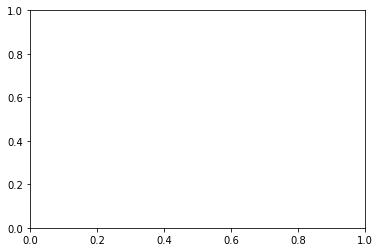

In [ ]:
itr = 50
lambda_ = 0.01
learning_rate = 0.03
initial_iteration = 0
cost_func_final, total_itr, Theta1_final, Theta2_final, Theta3_final = Gradient_Descent(X_train, Y_train, learning_rate, itr, ils, hls1, hls2, ols, lambda_)

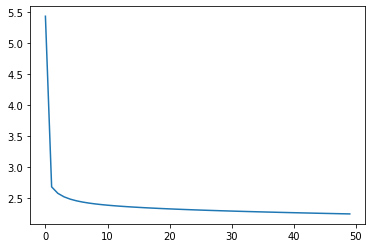

In [ ]:
plt.plot((np.arange(total_itr)), cost_func_final[0::53])

In [ ]:
def predict(Theta1, Theta2, Theta3, X_test):
    
    t = X_test.shape[0]
    y_predict = np.ones(t)*-1
    
    for i in range(t):
      a_1 = np.hstack((np.ones((1)),X_test[i]))
      z_2 = np.dot(Theta1,a_1)
      a_2 = np.hstack((np.ones(1), sigmoid(z_2)))
      z_3 = np.dot(Theta2, a_2)
      a_3 = np.hstack((np.ones(1), sigmoid(z_3)))
      z_4 = np.dot(Theta3, a_3)
      a_4 = softmax(z_4)
    
      y_predict[i] = np.argmax(a_4)
      
    return y_predict

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Y_Pred_train = predict(Theta1_final, Theta2_final, Theta3_final, X_train)
cm = confusion_matrix(Y_train, Y_Pred_train)
print(accuracy_score(Y_train,Y_Pred_train))
print(cm)

0.3277777777777778
[[1687  341  658  137  397  182  299  248 1158  306]
 [ 137 2306  153  180  196  184  352  233  595 1083]
 [ 747  253 1573  356  543  426  633  320  367  159]
 [ 357  377  572  972  421 1031  606  348  377  351]
 [ 606  245 1027  278 1267  413  618  340  402  171]
 [ 331  284  632  665  408 1692  502  359  367  177]
 [ 423  499  564  370  497  539 1689  208  325  274]
 [ 356  347  553  355  517  438  410 1602  420  413]
 [ 508  560  233  132  165  383  181  175 2593  465]
 [ 182 1173  166  145   93  169  229  218  707 2319]]


In [ ]:
Y_Pred_test = predict(Theta1_final, Theta2_final, Theta3_final, X_test)
cm = confusion_matrix(Y_test, Y_Pred_test)
print(accuracy_score(Y_test,Y_Pred_test))
print(cm)

0.3185
[[154  36  66   9  38  11  52  39 128  54]
 [ 14 232  12  17  24  20  35  19  75 133]
 [ 84  27 156  43  59  63  83  41  46  21]
 [ 37  51  61 100  40 128  65  38  40  28]
 [ 69  30 109  30 150  63  70  46  44  22]
 [ 47  39  61  62  43 193  52  38  31  17]
 [ 40  54  72  39  55  61 197  26  41  27]
 [ 35  48  60  36  54  54  42 155  57  48]
 [ 65  50  23  14  14  38  12  21 318  50]
 [ 11 152  18  11  11  19  21  26  74 256]]
